In [1]:
from scipy.fft import fft, fft2, ifft2
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import e, log
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [17]:
def int1(x, m):
    return np.tanh(x/2) * np.exp(-(x - m) ** 2 / (4 * m))

In [51]:
def phi(m):
    I = integrate.quad(lambda x: int1(x, m), -np.inf, np.inf)
    return 1 - (1/np.sqrt(4.0 * np.pi * m)) * I[0]

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_6072/1067075377.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return np.tanh(x/2) * np.exp(-(x - m) ** 2 / (4 * m))
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_6072/3855864247.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - (1/np.sqrt(4.0 * np.pi * m)) * I[0]
/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_6072/3855864247.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (1/np.sqrt(4.0 * np.pi * m)) * I[0]


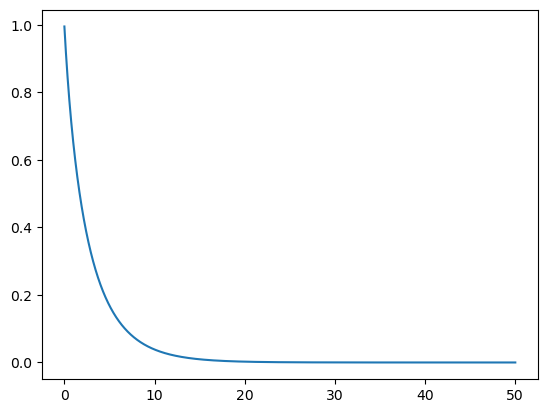

In [69]:
x = np.linspace(0, 50, 5000)

x_ans = [phi(i) for i in x]
plt.plot(x, x_ans)

In [13]:
def normal(x, mu = 0,sigma = 1):
    '''
    function for normal calculating density of normal distribution with given parametrs in the poiny
    '''
    return np.exp(-pow(mu - x, 2)/(2 * pow(sigma, 2))) / (sigma * np.sqrt(2*np.pi))

In [19]:
def phi(x):
    if (x >= 0) and (x <= 10):
        return np.exp(-0.4527* x **0.86 + 0.0218)
    else:
        return np.sqrt(np.pi/x) * np.exp(-x/4) * (1 - 10/(7 * x))

In [21]:
def d_phi(x):
    if (x >= 0) and (x <= 10):
        return -0.4527 * 0.86 * x ** (-0.14) * phi(x)
    else:
        return np.exp(-x/4)* np.sqrt(np.pi/x)*(-1/(2 * x) * (1 - 10/(7 * x)) - 1/4*(1 - 10/(7*x)) + 10/(7 * x ** 2))

In [24]:
def phi_inverse(y):
    '''''
    if (y <= 1.0221) and (y >= 0.0388):
        return ((0.0218 - np.log(y))/0.4527) ** (1/0.86)
    else:
        x0 = 0.0388
        x1 = x0 - (phi(x0) - y)/d_phi(x0)
        delta = abs(x1 - x0)
        epsilon = 1e-3
        while(delta >= epsilon):
            x0 = x1
            x1 = x1 - (phi(x1) - y)/d_phi(x1)
            if x1 > 1e1:
                epsilon = 0.1
            delta = abs(x1 - x0)
    return x1

In [37]:
max_iter = 1e3
dc = 10
dv = 5
sigma = 0.75
sigma_inc = 1e-4
Pe = 1e-6
l = 1
while (l <= max_iter):
    if l == 1:
        u_cn = phi_inverse(1 - (1 - phi(2/sigma ** 2)) ** (dc - 1))
        u_vn = 2/sigma ** 2 + (dv - 1) * u_cn
        current_Pe = 1 - integrate.quad(lambda x: normal(x), -np.inf, np.sqrt(u_vn/2))[0]
        if current_Pe < Pe:
            sigma = sigma + sigma_inc
            l = 1
        else:
            l = l + 1
    else:
        u_cn = phi_inverse(1 - (1 - phi(u_vn)) ** (dc - 1))
        u_vn = (dv - 1) * u_cn + 2/sigma ** 2
        current_Pe = 1 - integrate.quad(lambda x: normal(x), -np.inf, np.sqrt(u_vn/2))[0]
        if current_Pe < Pe:
            sigma = sigma + sigma_inc
            l = 1
        else:
            l = l + 1
    if l > max_iter:
        print('Gaussian Approximation is finished. The threshold sigma = ' + str(sigma - sigma_inc))


Gaussian Approximation is finished. The threshold sigma = 0.7909999999999955
